<a href="https://colab.research.google.com/github/AhmedMT3/KNN-SVM-Classifiers/blob/main/KNN_%26_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

## 1.1 Problem Statement

This is classification problem on Iris dataset.

The problem is the classification of iris flowers into one of the three species: **Setosa, Versicolor, and Virginica**.

This problem helps us to understand and implement basic classification algorithms.

The goal is to classify new iris samples using the K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) algorithms.

## 1.2 Objectives

 - Implement the (KNN) and (SVM) algorithms.
 - Evaluate and compare the performance of KNN and SVM.
 - Analyze and report the accuracy, precision, recall, and F1-score of both classifiers.
 - Develop a functional KNN classifier that can accurately predict the species of an iris flower based on its sepal and petal measurements.


# 2. Data Preparation

## 2.1 Data Collection

The dataset being used is the Iris dataset, a well-known dataset in the field of machine learning and statistics. It consists of 150 samples of iris flowers, each categorized into one of three species: Iris-setosa, Iris-versicolor, and Iris-virginica. Each sample has four numerical features: sepal length, sepal width, petal length, and petal width.

### Dataset source
 [Iris Dataset - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris)

### Summary of the dataset
 * Number of features: 4 (sepal length, sepal width, petal length, petal
  width)
 * Number of samples: 150
 * Number of classes: 3 (Iris-setosa, Iris-versicolor, Iris-virginica)
 * Class distribution: 50 samples per class, evenly distributed across the three species

# Upload iris.csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
import os
# To ensure the file is uploaded
os.listdir()

['.config', 'iris.csv', 'sample_data']

# Load Data
Create pandas dataFrame from the uploaded csv file

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Checking if the dataset is balanced or not



<Axes: ylabel='Species'>

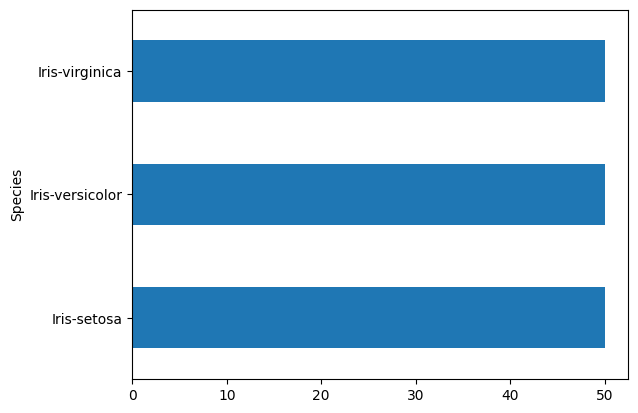

In [ ]:
import matplotlib.pyplot as plt

df.groupby('Species').size().plot(kind='barh')

# 2.3 Feature Selection/Engineering
Split the data into features and labels.

In [ ]:
X = df.drop(['Species','Id'], axis=1)
Y = df['Species']

In [ ]:
print("Features (X):")
X

Features (X):


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
print("Labels (Y):")
Y

Labels (Y):


,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


# 3. Model Training

## 3.1 Splitig data into 75% train, 25% test

1. Splitting the dataFrame into train & test dataFrames

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [ ]:
df_train.shape

(112, 6)

In [ ]:
df_test.shape

(38, 6)

2. Splittig the train and test dataFrames back into plain NumPy arrays



In [ ]:
# Train
x_train = df_train.drop(['Id', 'Species'], axis=1).values
y_train = df_train['Species'].values
# Test
x_test = df_test.drop(['Id', 'Species'], axis=1).values
y_test = df_test['Species'].values

In [ ]:
x_train.shape

(112, 4)

In [ ]:
y_train.shape

(112,)

## 3.2 Training th KNN & SVM models

### Training KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Training SVM model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

# 4. Model Evaluation

## Evaluating KNN model

In [ ]:
y_pred_knn = knn_model.predict(x_test)
## Comparing values
print("KNN Predicted Result: \n", y_pred_knn)
print("\nAcutal Result: \n", y_test)

KNN Predicted Result: 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']

Acutal Result: 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-set

## Evaluating SVM model

In [ ]:
y_pred_svm = svm_model.predict(x_test)
## Comparing values
print("SVM Predicted Result: \n", y_pred_svm)
print("\nAcutal Result: \n\n", y_test)

SVM Predicted Result: 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica']

Acutal Result: 

 ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-set

## 4.1 Performance metrics
Checking for accuracy using **accuracy_score** from sklearn

In [ ]:
from sklearn.metrics import accuracy_score

### KNN performance

In [ ]:
knn_acc = accuracy_score(y_test, y_pred_knn)
print("Accuracy = ", knn_acc)

Accuracy =  0.9210526315789473


### SVM performance

In [ ]:
svm_acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy = ", svm_acc)

Accuracy =  1.0


# References

- https://www.geeksforgeeks.org/iris-dataset/
- https://www.geeksforgeeks.org/project-knn-classifying-iris-dataset/
- https://github.com/kshitizrohilla/iris-flower-classification-using-k-nearest-neighbor-algorithm/blob/main/notebook.ipynb